## ADAM optimizer

Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks.

Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

For understanding the detailed mathematics refer to the link below:
https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c

### RMSProp optimizer

Here, dW is derivative of cost function w.r.t weights, alpha is learning rate, beta is momentum(generally between 0.9 to 0.999)

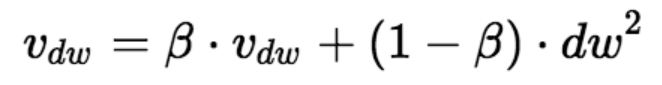

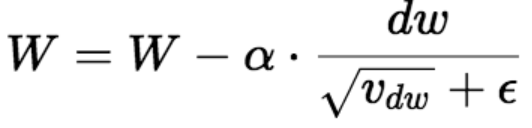

## Implementation

I have assumed stochastic funnction to be $x^{2}$-5*x + 3

In [2]:
import math

alpha = 0.0001 #learning rate
beta_1 = 0.9
beta_2 = 0.999 #initialize the values of the parameters
epsilon = 1e-8
def func(x):
    return x*x -5*x + 3
def grad_func(x): #calculates the gradient
    return 2*x - 5
theta_0 = 0 #initialize the vector
m_t = 0 
v_t = 0 
t = 0

while (1): #till it gets converged
    t+=1
    g_t = grad_func(theta_0)  #computes the gradient of the stochastic function
    m_t = beta_1*m_t + (1-beta_1)*g_t  #updates the moving averages of the gradient
    v_t = beta_2*v_t + (1-beta_2)*(g_t*g_t)  #updates the moving averages of the squared gradient
    m_cap = m_t/(1-(beta_1**t))  #calculates the bias-corrected estimates
    v_cap = v_t/(1-(beta_2**t))  #calculates the bias-corrected estimates
    theta_0_prev = theta_0
    theta_0 = theta_0 - (alpha*m_cap)/(math.sqrt(v_cap)+epsilon)  #updates the parameters
    if(theta_0 == theta_0_prev):  #checks if it is converged or not
        break


## Comparison between stochastic gradient descent function, rmsprop and adam optimizer

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [4]:
X,y=make_blobs(1000, centers=4, random_state=42)

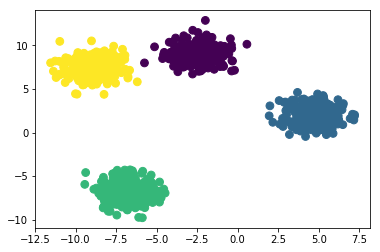

In [5]:
plt.scatter(X[:, 0], X[:, 1], s = 60, c=y)

In [6]:
ohe = OneHotEncoder(categories="auto")

In [7]:
y_hot = ohe.fit_transform(y.reshape(-1, 1)).todense()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [9]:
hidden = Dense(5, activation="relu", input_shape=(2,))
out = Dense(4, activation="softmax")

In [10]:
model = Sequential()
model.add(hidden)
model.add(out)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


### Adam optmizer 

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
670/670 [==============================] - 1s 1ms/step - loss: 3.2249 - acc: 0.2478
Epoch 2/50
670/670 [==============================] - 0s 30us/step - loss: 3.1219 - acc: 0.2478
Epoch 3/50
670/670 [==============================] - 0s 42us/step - loss: 3.0209 - acc: 0.2478
Epoch 4/50
670/670 [==============================] - 0s 31us/step - loss: 2.9179 - acc: 0.2478
Epoch 5/50
670/670 [==============================] - 0s 27us/step - loss: 2.8179 - acc: 0.2493
Epoch 6/50
670/670 [==============================] - 0s 27us/step - loss: 2.7154 - acc: 0.2507
Epoch 7/50
670/670 [==============================] - 0s 28us/step - loss: 2.6209 - acc: 0.2537
Epoch 8/50
670/670 [==============================] - 0s 34us/step - loss: 2.5237 - acc: 0.2537
Epoch 9/50
670/670 [==============================] - 0s 22us/step - loss: 2.4278 - acc: 0.2537
Epoch 10/50
670/670 [==============================] - 0s 28us/step - loss: 2.3354 - acc:

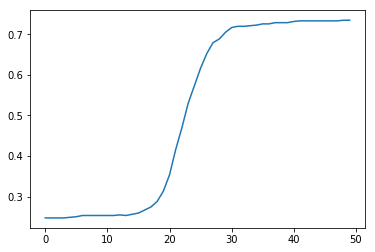

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
hist=model.fit(X_train, y_train, epochs=50, batch_size=200)
y=model.evaluate(X_test, y_test)
print(y)
plt.plot(hist.history["acc"])

### RMSProp

Epoch 1/50
670/670 [==============================] - 1s 1ms/step - loss: 0.2697 - acc: 0.8896
Epoch 2/50
670/670 [==============================] - 0s 19us/step - loss: 0.2488 - acc: 0.9015
Epoch 3/50
670/670 [==============================] - 0s 25us/step - loss: 0.2352 - acc: 0.9063
Epoch 4/50
670/670 [==============================] - 0s 19us/step - loss: 0.2241 - acc: 0.9138
Epoch 5/50
670/670 [==============================] - 0s 25us/step - loss: 0.2139 - acc: 0.9183
Epoch 6/50
670/670 [==============================] - 0s 22us/step - loss: 0.2050 - acc: 0.9220
Epoch 7/50
670/670 [==============================] - 0s 25us/step - loss: 0.1965 - acc: 0.9243
Epoch 8/50
670/670 [==============================] - 0s 27us/step - loss: 0.1884 - acc: 0.9269
Epoch 9/50
670/670 [==============================] - 0s 28us/step - loss: 0.1807 - acc: 0.9284
Epoch 10/50
670/670 [==============================] - 0s 19us/step - loss: 0.1734 - acc: 0.9306
Epoch 11/50
670/670 [===================

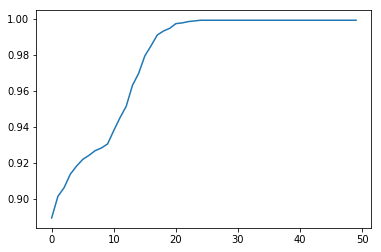

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=["accuracy"])
hist=model.fit(X_train, y_train, epochs=50, batch_size=200)
y=model.evaluate(X_test, y_test)
print(y)
plt.plot(hist.history["acc"])

### Stochastic gradient descent

Epoch 1/50
670/670 [==============================] - 0s 647us/step - loss: 0.0026 - acc: 0.9985
Epoch 2/50
670/670 [==============================] - 0s 15us/step - loss: 0.0026 - acc: 0.9985
Epoch 3/50
670/670 [==============================] - 0s 24us/step - loss: 0.0026 - acc: 0.9985
Epoch 4/50
670/670 [==============================] - 0s 22us/step - loss: 0.0026 - acc: 0.9985
Epoch 5/50
670/670 [==============================] - 0s 21us/step - loss: 0.0026 - acc: 0.9985
Epoch 6/50
670/670 [==============================] - 0s 19us/step - loss: 0.0026 - acc: 0.9985
Epoch 7/50
670/670 [==============================] - 0s 22us/step - loss: 0.0026 - acc: 0.9985
Epoch 8/50
670/670 [==============================] - 0s 19us/step - loss: 0.0026 - acc: 0.9985
Epoch 9/50
670/670 [==============================] - 0s 19us/step - loss: 0.0025 - acc: 0.9985
Epoch 10/50
670/670 [==============================] - 0s 22us/step - loss: 0.0025 - acc: 0.9985
Epoch 11/50
670/670 [=================

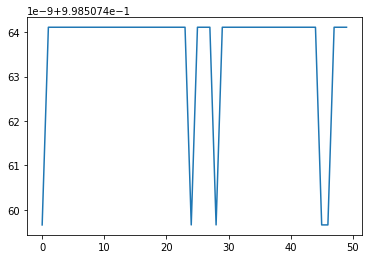

In [13]:
model.compile(loss='mean_squared_error', optimizer='sgd',metrics=["accuracy"])
hist=model.fit(X_train, y_train, epochs=50, batch_size=200)
model.evaluate(X_test, y_test)
plt.plot(hist.history["acc"])